In [2]:
from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from scipy.optimize import fmin_cobyla
%matplotlib inline

In [3]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)


In [4]:
#------------------------------------------------------------
# define a squared exponential covariance function
def squared_exponential(x1, x2, h):
    return np.exp(-0.5 * (x1 - x2) ** 2 / h ** 2)

In [5]:
#------------------------------------------------------------
# draw samples from the unconstrained covariance
np.random.seed(1)
x = np.linspace(0, 10, 100)
h = 1.0

mu = np.zeros(len(x))
C = squared_exponential(x, x[:, None], h)
draws = np.random.multivariate_normal(mu, C, 3)


In [13]:
# (x-x[:,None])  : 100 x 100 matrix of the distances between points in x 

In [14]:
draws.shape

(3, 100)

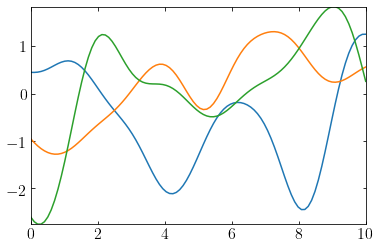

In [16]:
for idx in np.arange(draws.shape[0]):
    plt.plot(x,draws[idx,:])

In [17]:
#------------------------------------------------------------
# Constrain the mean and covariance with two points
x1 = np.array([2.5, 7])
y1 = np.cos(x1)
kernel1 = kernels.RBF(1/0.5, (1/0.5, 1/0.5))
gp1 = GaussianProcessRegressor(kernel=kernel1, random_state=0, normalize_y=True)
gp1.fit(x1[:, None], y1)
f1, f1_err = gp1.predict(x[:, None], return_std=True)

In [25]:
f1

array([-0.40851804, -0.43284142, -0.45756317, -0.48257014, -0.50773901,
       -0.5329369 , -0.55802204, -0.58284461, -0.60724779, -0.63106879,
       -0.65414018, -0.67629113, -0.69734893, -0.71714046, -0.73549372,
       -0.7522395 , -0.76721291, -0.78025503, -0.79121447, -0.79994891,
       -0.80632649, -0.81022726, -0.81154438, -0.81018526, -0.80607259,
       -0.79914515, -0.78935852, -0.77668565, -0.76111719, -0.74266171,
       -0.72134578, -0.69721381, -0.67032782, -0.64076705, -0.6086274 ,
       -0.57402077, -0.53707431, -0.49792955, -0.45674145, -0.41367736,
       -0.36891592, -0.32264595, -0.27506525, -0.22637934, -0.17680028,
       -0.12654532, -0.07583568, -0.0248952 ,  0.02605091,  0.07677742,
        0.1270604 ,  0.17667846,  0.2254141 ,  0.27305501,  0.31939528,
        0.3642367 ,  0.40739   ,  0.44867597,  0.48792668,  0.52498653,
        0.5597133 ,  0.59197909,  0.62167122,  0.64869296,  0.67296425,
        0.69442219,  0.71302147,  0.72873464,  0.74155222,  0.75

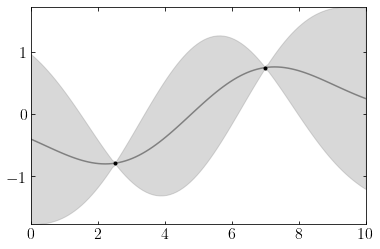

In [26]:
ax = plt.subplot(111)
ax.plot(x, f1, '-', color='gray')
ax.fill_between(x, f1 - 2 * f1_err, f1 + 2 * f1_err, color='gray', alpha=0.3)
ax.plot(x1, y1, '.k', ms=6)
plt.show()

In [18]:
#------------------------------------------------------------
# Constrain the mean and covariance with two noisy points
#  scikit-learn gaussian process uses nomenclature from the geophysics
#  community, where a "nugget (alpha parameter)" can be specified.
#  The diagonal of the assumed covariance matrix is multiplied by the nugget.
#  This is how the error on inputs is incorporated into the calculation.
dy2 = 0.2
kernel2 = kernels.RBF(1/0.5, (1/0.5, 1/0.5))
gp2 = GaussianProcessRegressor(kernel=kernel2,
                               alpha=(dy2 / y1) ** 2, random_state=0)
gp2.fit(x1[:, None], y1)
f2, f2_err = gp2.predict(x[:, None], return_std=True)


<ErrorbarContainer object of 3 artists>

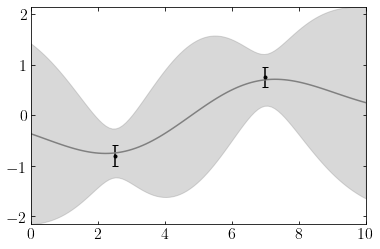

In [27]:
ax = plt.subplot(111)
ax.plot(x, f2, '-', color='gray')
ax.fill_between(x, f2 - 2 * f2_err, f2 + 2 * f2_err, color='gray', alpha=0.3)
ax.errorbar(x1, y1, dy2, fmt='.k', ms=6)

In [19]:
#------------------------------------------------------------
# Constrain the mean and covariance with many noisy points
x3 = np.linspace(0, 10, 20)
y3 = np.cos(x3)
dy3 = 0.2
y3 = np.random.normal(y3, dy3)

kernel3 = kernels.RBF(0.5, (0.01, 10.0))
gp3 = GaussianProcessRegressor(kernel=kernel3,
                               alpha=(dy3 / y3) ** 2, random_state=0)
gp3.fit(x3[:, None], y3)
f3, f3_err = gp3.predict(x[:, None], return_std=True)

# we have fit for the `h` parameter: print the result here:
print("best-fit theta =", gp3.kernel_.theta[0])

best-fit theta = 0.5069334228896027


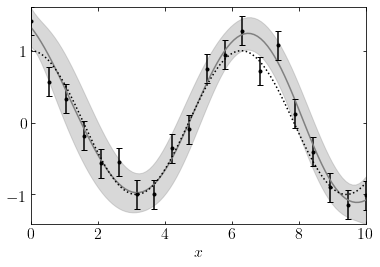

In [28]:
ax = plt.subplot(111)
ax.plot(x, f3, '-', color='gray')
ax.fill_between(x, f3 - 2 * f3_err, f3 + 2 * f3_err, color='gray', alpha=0.3)
ax.errorbar(x3, y3, dy3, fmt='.k', ms=6)

ax.plot(x, np.cos(x), ':k')

ax.set_xlabel('$x$')

for ax in fig.axes:
    ax.set_xlim(0, 10)

plt.show()


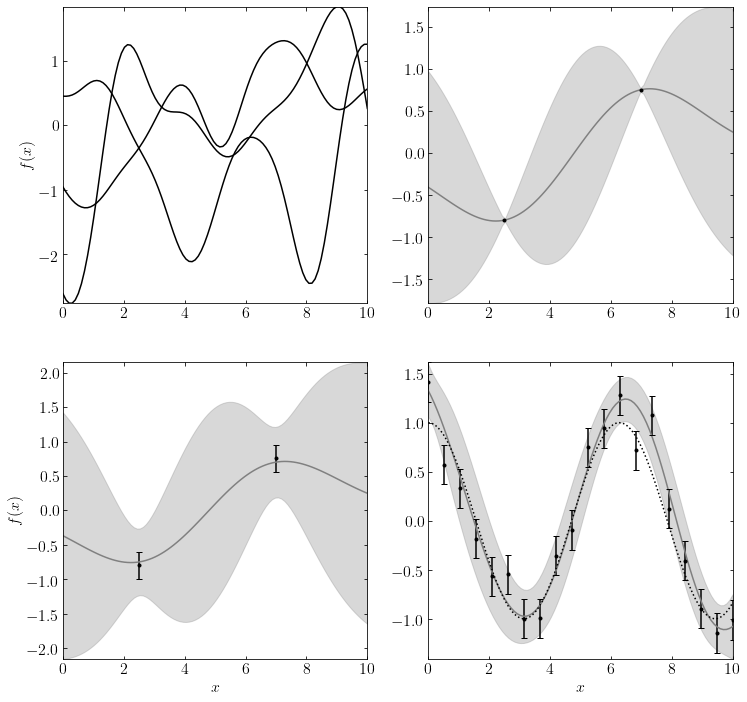

In [21]:
#------------------------------------------------------------
# Plot the diagrams
fig = plt.figure(figsize=(12, 12))


# first: plot a selection of unconstrained functions
ax = fig.add_subplot(221)
ax.plot(x, draws.T, '-k')
ax.set_ylabel('$f(x)$')

# second: plot a constrained function
ax = fig.add_subplot(222)
ax.plot(x, f1, '-', color='gray')
ax.fill_between(x, f1 - 2 * f1_err, f1 + 2 * f1_err, color='gray', alpha=0.3)
ax.plot(x1, y1, '.k', ms=6)


# third: plot a constrained function with errors
ax = fig.add_subplot(223)
ax.plot(x, f2, '-', color='gray')
ax.fill_between(x, f2 - 2 * f2_err, f2 + 2 * f2_err, color='gray', alpha=0.3)
ax.errorbar(x1, y1, dy2, fmt='.k', ms=6)

ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

# third: plot a more constrained function with errors
ax = fig.add_subplot(224)
ax.plot(x, f3, '-', color='gray')
ax.fill_between(x, f3 - 2 * f3_err, f3 + 2 * f3_err, color='gray', alpha=0.3)
ax.errorbar(x3, y3, dy3, fmt='.k', ms=6)

ax.plot(x, np.cos(x), ':k')

ax.set_xlabel('$x$')

for ax in fig.axes:
    ax.set_xlim(0, 10)

plt.show()
